<h1>Import libraries<h1>

In [1]:
from Model.Logistic_Regression_from_scratch import *
from Metrics.Classification_metrics import *
from Plots.Prediction_plots import *
Plots_predictions = Prediction_plots()

<h1>Explanation of Logistic Regression<h1>

$\text{Logistic regression is a regression method thanks which we are able to predict probability of each class for our dependent variable.}$<p>

$\text{In a binary problem we can calculate probability as follows:}$
$$p_{0,i}=1-p_{1,i}$$
$$\ln{\left(\frac{p_{1,i}}{1-p_{1,i}}\right)}=\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}$$
$$e^{\ln{\left(\frac{p_{1,i}}{1-p_{1,i}}\right)}}=e^{(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i})}$$
$$\frac{p_{1,i}}{1-p_{1,i}}=e^{-\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}\right)}$$
$$p_{1,i}=e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_k\times x_{k,i}\right)}-p_{1,i}\times e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}\right)}$$
$$p_{1,i}\times\left(1+e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_k\times x_{k,i}\right)}\right)=e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}\right)}$$
$$p_{1,i}=\frac{e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}\right)}}{1+e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}\right)}}$$
$$p_{1,i}=\frac{1}{1+e^{-(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i})}}$$
$\text{Where: } p_{0,i} \text{ – probability of class 0 for observation } i,$<p>
$p_{1,i} \text{ – probability of class 1 for observation } i,$<p>
$\beta_m \text{ – coefficient } m \text{of the estimator,}$<p>
$x_{m,i} \text{ – the value of variable } m \text{ for observation }i,$<p>
$M \text{ – number of independent variables.}$

$\text{For the multiclassification, we also need to determine some base level (note that for the binary it was determined by class 0), to which we will compare the other classes.}$<p>
$\text{In this way, we will be able to subdivide the binary into "subproblems":}$
$$Class 1: \ln{\left(\frac{p_{1,i}}{p_{0,i}}\right)}=\beta_1^T\times x_i$$
$$Class\ 2:\ \ln{\left(\frac{p_{2,i}}{p_{0,i}}\right)}=\beta_2^T\times x_i$$
$$\ldots$$
$$Class\ K-1: \ln{\left(\frac{p_{K-1,i}}{p_{0,i}}\right)}=\beta_{K-1}^T\times x_i$$
$$Class\ 0:\ 1-\sum_{k=1}^{K-1}p_{k,i}$$
$\text{Where: }K \text{ - the number of classes of the dependent variable.}$<p>

$\text{Instead of one set of coefficients, we will have as many as K-1.}$<P>
$\text{After transformations (similar to those performed above for the binary problem), resulting from the fact that:}$
$$p_{0,i}=1-p_{1,i}-p_{2,i}-\ldots-p_{K-1,i}$$
$\text{we get:}$
$$Class 1: \ p_{1,i}=\frac{e^{\beta_1^T\times x_i}}{1+\sum_{k=1}^{K-1}e^{\beta_k^T\times x_i}}$$
$$Class 2: \ p_{2,i}=\frac{e^{\beta_2^T\times x_i}}{1+\sum_{k=1}^{K-1}e^{\beta_k^T\times x_i}}$$
$$\ldots$$
$$Class K-1: \ p_{K-1,i}=\frac{e^{\beta_{K-1}^T\times x_i}}{1+\sum_{k=1}^{K-1}e^{\beta_k^T\times x_i}}$$
$$Class 0: \ p_{0,i}=\frac{1}{1+\sum_{k=1}^{K-1}e^{\beta_k^T\times x_i}}$$
$\text{Thus, let us note that, in general, the binary and multiclass logistic regression problem for class k and observation i can be written as:}$
$$p_{k,i}=\frac{e^{\beta_k^T\times x_i}}{1+\sum_{k=1}^{K-1}e^{\beta_k^T\times x_i}}$$

<h2>Finding optimal values of coefficients<h2>

$\text{As presented above, the value that we optimize is the logarithm of "odds" - } log\_odds:$
$${\hat{y}}_i=\ln{\left(\frac{{\hat{p}}_i}{1-{\hat{p}}_i}\right)}$$
$\text{The conversion of } log\_odds \text{ into probability is given by the following formula:}$
$${\hat{p}}_i=\frac{1}{1+e^{-log\_odds}}=\frac{1}{1+e^{-{\hat{y}}_i}}$$
$\text{The basic loss function for logistic regression is } log\_loss:$
$$log{\_loss}=\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\ln{\left({\hat{p}}_i\right)}+\ln{\left(1-{\hat{p}}_i\right)}-y_i\times\ln{\left(1-{\hat{p}}_i\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\left(\ln{\left({\hat{p}}_i\right)}-\ln{\left(1-{\hat{p}}_i\right)}\right)+\ln{\left(1-{\hat{p}}_i\right)}\right)$$
$\text{Converting: } {\hat{p}}_i\rightarrow{\hat{y}}_i:$
$$log{\_loss}=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\left(\ln{\left(\frac{1}{1+e^{-{\hat{y}}_i}}\right)}-\ln{\left(1-\frac{1}{1+e^{-{\hat{y}}_i}}\right)}\right)+\ln{\left(1-\frac{1}{1+e^{-{\hat{y}}_i}}\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\left(\ln{\left(\frac{1}{1+e^{-{\hat{y}}_i}}\right)}-\ln{\left(\frac{e^{-{\hat{y}}_i}}{1+e^{-{\hat{y}}_i}}\right)}\right)+\ln{\left(\frac{e^{-{\hat{y}}_i}}{1+e^{-{\hat{y}}_i}}\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\ln{\left(\frac{\frac{1}{1+e^{-{\hat{y}}_i}}}{\frac{e^{-{\hat{y}}_i}}{1+e^{-{\hat{y}}_i}}}\right)}+\ln{\left(\frac{1}{1+e^{{\hat{y}}_i}}\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\ln{\left(\frac{1}{e^{-{\hat{y}}_i}}\right)}-\ln{\left(1+e^{{\hat{y}}_i}\right)}\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times{\hat{y}}_i-\ln{\left(1+e^{{\hat{y}}_i}\right)}\right)$$
$\text{The values we are looking for and want to optimize are the coefficients: } \beta.$<p>
$\text{So let's convert again: } {\hat{y}}_i\rightarrow\beta:$
$$log\_loss=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times\beta^T\times x_i-\ln{\left(1+e^{\beta^T\times x_i}\right)}\right)$$
$\text{We need to find a value } \beta \text{ that minimizes the function above.}$<p>
$\text{Using the gradient descent algorithm, we can find the optimal values of our } \beta \text{ estimator with a sufficiently large number of iterations.}$<p>
$\text{Updating the } \beta \text{ value looks like this:}$
$$\beta_{new}=\beta_{old}-learning_rate\ \times\frac{\partial log\_loss\left(\beta\right)}{\partial\beta}$$
$$\frac{\partial log\_loss\left(\beta\right)}{\partial\beta}=-\frac{1}{N}\times\sum_{i=1}^{N}\left(\frac{\partial}{\partial\beta}\left(y_i\times\beta^T\times x_i\right)-\frac{\partial}{\partial\beta}\left(\ln{\left(1+e^{\beta^T\times x_i}\right)}\right)\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times x_i-\frac{1}{1+e^{\beta^T\times x_i}}\times\frac{\partial}{\partial\beta}\left(\left(1+e^{\beta^T\times x_i}\right)\right)\right)=$$
$$=-\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i\times x_i-x_i\times\frac{e^{\beta^T\times x_i}}{1+e^{\beta^T\times x_i}}\right)=-\frac{1}{N}\times\sum_{i=1}^{N}\left(\left(y_i-\frac{1}{1+e^{-\beta^T\times x_i}}\right)\times x_i\right)$$
$\text{Since } \frac{\partial log\_loss\left(\beta\right)}{\partial\beta} \text{ should be returned as a vector with the same dimensions as: } \begin{bmatrix}
\beta_{0} \\
\beta_{1} \\
\vdots \\
\beta_{M} 
\end{bmatrix} \text{ let's convert the sum into a matrix :}$
$$\frac{\partial log\_loss\left(\beta\right)}{\partial\beta}-\frac{1}{N}\times\sum_{i=1}^{N}\left(\left(y_i-\frac{1}{1+e^{-\beta^T\times x_i}}\right)\times x_i\right)=-\frac{1}{N}\times X^T\times\left(y-\frac{1}{1+e^{-\beta^T\times X^T}}\right)$$
$\text{So finally the optimization problem can be reduced to the following equation:}$
$$\beta_{new}=\beta_{old}-learning\ rate\times\left(-\frac{1}{N}\times X^T\times\left(y-\frac{1}{1+e^{-\beta^T\times X^T}}\right)\right)$$
$\text{In the case of multiclassification, the approach will be analogous, but we break down to many binary problems each time looking for new coefficients.}$

<h1>Preprocessing<h1>

<h2>Download data<h2>

In [2]:
data = pd.read_csv("Data/bank-balanced.csv")
X = data.drop("deposit", axis=1)
y = data["deposit"]

In [3]:
print("Number of observations in data: {}".format(len(data)))
data.head()

Number of observations in data: 11162


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<h2>Check for null data<h2>

In [4]:
data.isnull().sum()/len(data)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

<h3>Check dtypes of dataset<h3>

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

<h2>Divide our data into train and test sets<h2>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=0.2)

$\text{Because of the assumption of a normal distribution of our continuous variables, it is worth modifying their distribution before modeling.}$<p>
$\text{For this purpose, the Z-score will be used, which is described by the following formula:}$

$${\hat{X}}_{m, i}=\frac{X_{m, i}-{\bar{X}}_m}{\sigma_m}$$

$\text{Where: } {\hat{X}}_{m, i} \text{ - standardized observation } i \text{ of variable } m,$<p>
$X_{m, i} \text{ - observation } i \text{ of variable } m,$<p>
${\bar{X}}_m \text{ - mean of variable } m,$<p>
$\sigma_m \text{ - standard deviation of variable } m.$

$\text{To properly approach the modeling process, the test set should remain unknown until the prediction is made.}$<p>
$\text{For this reason, we will only learn the mean and standard deviation for the training set and transform}$<p>
$\text{the two data sets based on just these values.}$ 

In [7]:
categorical_data_train = X_train.select_dtypes(include="object")
continous_data_train = X_train.select_dtypes(exclude="object")
categorical_data_test = X_test.select_dtypes(include="object")
continous_data_test = X_test.select_dtypes(exclude="object")
categorical_data_train = pd.get_dummies(categorical_data_train, drop_first=True, dtype=int)
categorical_data_test = pd.get_dummies(categorical_data_test, drop_first=True, dtype=int)
mean_train = np.mean(continous_data_train, axis=0)
std_train = np.std(continous_data_train, axis=0)
continous_data_train = (continous_data_train-mean_train)/std_train
continous_data_test = (continous_data_test-mean_train)/std_train

In [8]:
X_train = pd.concat([categorical_data_train, continous_data_train], axis=1)
X_test = pd.concat([categorical_data_test, continous_data_test], axis=1)

<h1>Modelling<h1>

$\text{To verify how well our algorithms are able to perform, a cross-validation will be used on the training set (in order to average the results obtained).}$<p>
$\text{Then we will check whether the algorithms will perform equally well (or even better) on the test data.}$

In [9]:
class Cross_Validation():
    def __init__(self, metric, algorithm_instance, cross_validation_instance):
        metrics = {"accuracy": [lambda y, y_pred: accuracy_score(y, y_pred), "preds"],
                    "roc_auc": [lambda y, y_pred: roc_auc_score(y, y_pred), "probs"],
                    "mse": [lambda y, y_pred: mean_squared_error(y, y_pred), "preds"],
                    "rmse": [lambda y, y_pred: mean_squared_error(y, y_pred)**0.5, "preds"],
                    "mae": [lambda y, y_pred: mean_absolute_error(y, y_pred), "preds"]}
        if metric not in metrics:
            raise ValueError('Unsupported metric: {}'.format(metric))
        self.eval_metric = metrics[metric][0]
        self.metric_type = metrics[metric][1]
        self.algorithm = algorithm_instance
        self.cv = cross_validation_instance
    
    def fit(self, X, y, verbose=False):
        X = self.check_X(X=X)
        y = self.check_y(y=y)
        self.train_scores, self.valid_scores = [], []
        for iter, (train_idx, valid_idx) in enumerate(self.cv.split(X, y)):
            X_train, X_valid = X[train_idx, :], X[valid_idx, :]
            y_train, y_valid = y[train_idx], y[valid_idx]
            self.algorithm.fit(X_train, y_train)
            if(self.metric_type == "preds"):
                y_train_pred = self.algorithm.predict(X_train)
                y_valid_pred = self.algorithm.predict(X_valid)
            else:
                y_train_pred = self.algorithm.predict_proba(X_train)[:, 1]
                y_valid_pred = self.algorithm.predict_proba(X_valid)[:, 1]
            self.train_scores.append(self.eval_metric(y_train, y_train_pred))
            self.valid_scores.append(self.eval_metric(y_valid, y_valid_pred))
            if(verbose == True):
                print("Iter {}: train scores: {}; valid scores: {}".format(iter, np.round(self.eval_metric(y_train, y_train_pred), 5), np.round(self.eval_metric(y_valid, y_valid_pred), 5)))
        return np.mean(self.train_scores), np.mean(self.valid_scores)
    
    def check_X(self, X):
        if not isinstance(X, pd.DataFrame) and not isinstance(X, np.ndarray) and not torch.is_tensor(X):
            raise TypeError('Wrong type of X. It should be dataframe, numpy array or torch tensor.')
        X = np.array(X)
        if(X.ndim == 1):
            X = X[None, :]
        return X
    
    def check_y(self, y):
        if not isinstance(y, pd.DataFrame) and not isinstance(y, pd.Series) and not isinstance(y, np.ndarray) and not torch.is_tensor(y):
            raise TypeError('Wrong type of y. It should be pandas DataFrame, pandas Series, numpy array or torch tensor.')
        y = np.array(y)
        if(y.ndim == 2):
            y = y.squeeze()
        return y

In [10]:
CV = Cross_Validation(metric="roc_auc", algorithm_instance=Logistic_Regression(fit_intercept=True, random_state=17, learning_rate=0.1, max_iter=500), cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=True)
print("Mean of train scores: {}; Mean of valid scores: {}".format(np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

Iter 0: train scores: 0.89163; valid scores: 0.88649
Iter 1: train scores: 0.8847; valid scores: 0.87891
Iter 2: train scores: 0.88448; valid scores: 0.89458
Iter 3: train scores: 0.89148; valid scores: 0.88218
Iter 4: train scores: 0.88602; valid scores: 0.88345
Mean of train scores: 0.88766; Mean of valid scores: 0.88512


$\text{Check the results for original test dataset.}$

In [11]:
model = Logistic_Regression(fit_intercept=True, random_state=17, learning_rate=0.1, max_iter=500)
model.fit(X_train, y_train)
y_prob_train = model.predict_proba(X_train)[:,1]
y_prob_test = model.predict_proba(X_test)[:,1]
print("Logistic Regression: Train: {}; Test: {}".format(np.round(roc_auc_score(y_train, y_prob_train), 4), np.round(roc_auc_score(y_test, y_prob_test), 4)))

Logistic Regression: Train: 0.8913; Test: 0.8887


$\text{Write down predictions for the future}$

In [12]:
base_predictions = model.predict(X_test)
base_probabilities = model.predict_proba(X_test)[:, 1]

$\text{We will try to tune hyperparameters to see whether we can improve accuracy.}$<p>

<h1>Optimization<h1>

$\text{Actually the only parameter that we are able to tune is } learning\_rate.$<p>
$learning\_rate \ [float] \text{: specifies learning rate for gradient descent optimization.}$<p>
$\text{Higher values should lead to faster finding of optimal coefficient.}$

In [13]:
model = Logistic_Regression(fit_intercept=True, random_state=17, max_iter=500)
for learning_rate in np.linspace(0.1, 6.0, 15):
    model = Logistic_Regression(fit_intercept=True, random_state=17, learning_rate=learning_rate, max_iter=500)
    CV = Cross_Validation(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
    mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=False)
    print("learning_rate: {}; Mean of train scores: {}; Mean of valid scores: {}".format(learning_rate, np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

learning_rate: 0.1; Mean of train scores: 0.88766; Mean of valid scores: 0.88512
learning_rate: 0.5214285714285715; Mean of train scores: 0.90244; Mean of valid scores: 0.89984
learning_rate: 0.9428571428571428; Mean of train scores: 0.90398; Mean of valid scores: 0.90124
learning_rate: 1.3642857142857143; Mean of train scores: 0.90448; Mean of valid scores: 0.90162
learning_rate: 1.7857142857142858; Mean of train scores: 0.90471; Mean of valid scores: 0.90181
learning_rate: 2.2071428571428573; Mean of train scores: 0.90484; Mean of valid scores: 0.90189
learning_rate: 2.6285714285714286; Mean of train scores: 0.90493; Mean of valid scores: 0.90194
learning_rate: 3.0500000000000003; Mean of train scores: 0.90497; Mean of valid scores: 0.90197
learning_rate: 3.4714285714285715; Mean of train scores: 0.90499; Mean of valid scores: 0.90199
learning_rate: 3.892857142857143; Mean of train scores: 0.90501; Mean of valid scores: 0.902
learning_rate: 4.314285714285714; Mean of train scores: 0.

$\text{We see that as we increase the } learning\_rate \text{ we obtain better results.}$<p>
$\text{However, from the level of } learning\_rate \approx 3.9 \text{ we can see a exacerbation.}$<p>
$\text{We can take a closer look for range: } [3, 4.5]$

In [14]:
model = Logistic_Regression(fit_intercept=True, random_state=17, max_iter=500)
for learning_rate in np.linspace(3.5, 4.5, 15):
    model = Logistic_Regression(fit_intercept=True, random_state=17, learning_rate=learning_rate, max_iter=500)
    CV = Cross_Validation(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
    mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=False)
    print("learning_rate: {}; Mean of train scores: {}; Mean of valid scores: {}".format(learning_rate, np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

learning_rate: 3.5; Mean of train scores: 0.905; Mean of valid scores: 0.90199
learning_rate: 3.5714285714285716; Mean of train scores: 0.905; Mean of valid scores: 0.90199
learning_rate: 3.642857142857143; Mean of train scores: 0.905; Mean of valid scores: 0.90198
learning_rate: 3.7142857142857144; Mean of train scores: 0.90501; Mean of valid scores: 0.90198
learning_rate: 3.7857142857142856; Mean of train scores: 0.90501; Mean of valid scores: 0.90199
learning_rate: 3.857142857142857; Mean of train scores: 0.90501; Mean of valid scores: 0.90199
learning_rate: 3.9285714285714284; Mean of train scores: 0.90501; Mean of valid scores: 0.90199
learning_rate: 4.0; Mean of train scores: 0.90501; Mean of valid scores: 0.90199
learning_rate: 4.071428571428571; Mean of train scores: 0.90501; Mean of valid scores: 0.90199
learning_rate: 4.142857142857142; Mean of train scores: 0.90502; Mean of valid scores: 0.90199
learning_rate: 4.214285714285714; Mean of train scores: 0.90502; Mean of valid s

$\text{Differences are not that big but it seems like best valid score was obtained for } learning\_rate \approx 3.9$

<h1>Evaluation and Visualization<h1>

In [15]:
print("Balance accuracy score: {}".format(np.round(balanced_accuracy_score(y_true=y_test, y_pred=base_predictions), 5)))
print("Roc AUC score: {}".format(np.round(roc_auc_score(y_true=y_test, y_score=base_probabilities), 5)))
report = classification_report(y_test, base_predictions, output_dict=True)
df = pd.DataFrame(report).transpose()
print(tabulate(df, headers="keys", tablefmt = 'psql'))

Balance accuracy score: 0.80857
Roc AUC score: 0.8887
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| no           |    0.796281 | 0.85134  |   0.822891 | 1157        |
| yes          |    0.827309 | 0.765799 |   0.795367 | 1076        |
| accuracy     |    0.810121 | 0.810121 |   0.810121 |    0.810121 |
| macro avg    |    0.811795 | 0.808569 |   0.809129 | 2233        |
| weighted avg |    0.811233 | 0.810121 |   0.809628 | 2233        |
+--------------+-------------+----------+------------+-------------+


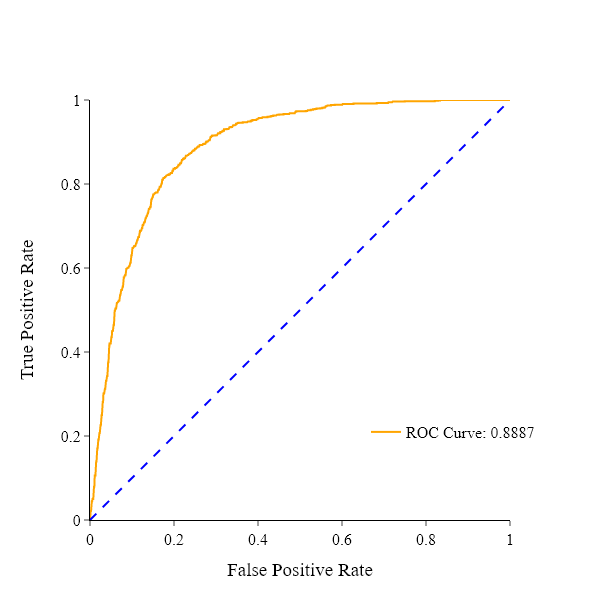

In [16]:
encoder = OrdinalEncoder()
y_test_encoded = encoder.fit_transform(np.array(y_test).reshape(-1,1))
Plots_predictions.roc_auc_plot(y_true=y_test_encoded, y_prob=base_probabilities)

$\text{For Logistic Regression with optimized } learning\_rate \approx 3.9$

In [17]:
final_algorithm_optimized = Logistic_Regression(fit_intercept=True, learning_rate=3.9, random_state=17, max_iter=500)
final_algorithm_optimized.fit(X_train, np.array(y_train).squeeze())
y_pred_final_optimized = final_algorithm_optimized.predict(X_test)
y_prob_final_optimized = final_algorithm_optimized.predict_proba(X_test)[:, 1]
print("Balance accuracy score: {}".format(np.round(balanced_accuracy_score(y_true=y_test, y_pred=y_pred_final_optimized), 5)))
print("Roc AUC score: {}".format(np.round(roc_auc_score(y_true=y_test, y_score=y_prob_final_optimized), 5)))
report = classification_report(y_test, y_pred_final_optimized, output_dict=True)
df = pd.DataFrame(report).transpose()
print(tabulate(df, headers="keys", tablefmt = 'psql'))

Balance accuracy score: 0.8244
Roc AUC score: 0.9045
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| no           |    0.819317 | 0.850475 |   0.834606 | 1157        |
| yes          |    0.832364 | 0.798327 |   0.814991 | 1076        |
| accuracy     |    0.825347 | 0.825347 |   0.825347 |    0.825347 |
| macro avg    |    0.825841 | 0.824401 |   0.824798 | 2233        |
| weighted avg |    0.825604 | 0.825347 |   0.825154 | 2233        |
+--------------+-------------+----------+------------+-------------+


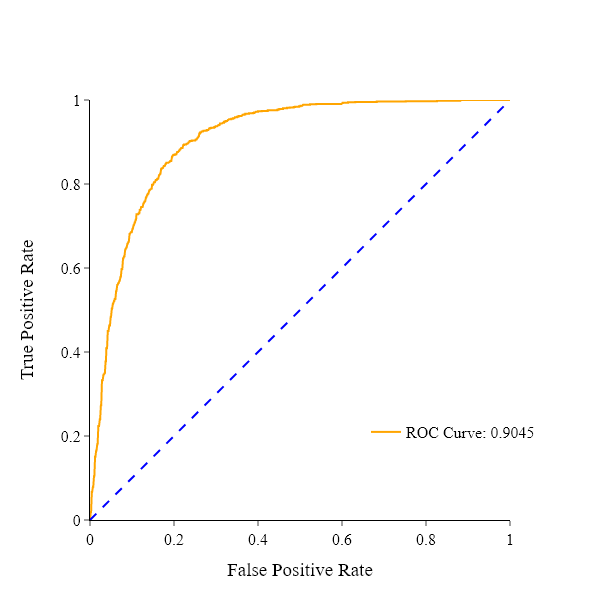

In [18]:
Plots_predictions.roc_auc_plot(y_true=y_test_encoded, y_prob=y_prob_final_optimized)

$\text{As we can see tuning have improved the effectiveness of the Logistic Regression!}$

<h2>Interpretation of coefficients<h2>

$\text{The general interpretation of the } \beta_m \text{ coefficient can be described as follows:}$<p>
$\text{The expected chance of class 1 after increasing } X_m \text{ by } t \text{ units, to the chance of class 1 while leaving } X_m \text{ unchanged is } e^{\beta_m\times t}.$

$\text{Let's interpret coefficients of our Logistic Regression.}$

In [19]:
final_algorithm_optimized.summary(features_names=["Intercept"]+X_train.columns.tolist())

,Variables,Coefficients
0,Intercept,0.873043
1,job_blue-collar,-0.235381
2,job_entrepreneur,-0.312409
3,job_housemaid,-0.407802
4,job_management,-0.257644
5,job_retired,0.331800
6,job_self-employed,-0.404473
7,job_services,-0.222309
8,job_student,0.646595
9,job_technician,-0.090616


$\text{Target variable: deposit - whether the customer has set up a deposit: yes (1) or not (0).}$

$\text{Target: the customer opened a bank deposit (1) or not (0).}$<p>
$\text{Continuous variable: } age \text{ – client's age.}$<p>
$$\beta_{age}=0.0273; \ t=1$$
$$e^{\beta_{age}}=e^{0.0273}=1.027$$
$\text{Thus, the expected chance that an age+1 customer will open a bank deposit, in relation to the chance that an age+1 customer will open a bank deposit, is 1.027.}$<p>
$\text{Binary variable: } housing\_yes \text{ - has a mortgage (1) or not (0).}$<p>
$$\beta_{housing\_yes}=-0.7258; \ t=1$$
$$e^{\beta_{housing\_yes}}=e^{-0.7258}=0.4839$$
$\text{Thus, the expected chance that a customer with a mortgage loan will open a bank deposit in relation to the chance that a customer without a loan will open a bank deposit is 0.4839.}$

<h1> Multiclassification <h1>

<h1>Preprocessing<h1>

<h2>Download data<h2>

In [20]:
from sklearn.datasets import load_iris
X = load_iris(as_frame=True)['data']
y = load_iris(as_frame=True)['target']
print("Number of observations in data: {}".format(len(X)))
X.head()

Number of observations in data: 150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h2>Check for null data<h2>

In [21]:
X.isnull().sum()/len(X)

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

<h2>Divide data<h2>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=0.2)

<h3>Scale data<h3>

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
model = Logistic_Regression(fit_intercept=True, random_state=17, learning_rate=0.1, max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

<h1>Evaluation and Visualization<h1>

In [25]:
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy score: 0.6666666666666666


<h3>Confussion matrix<h3>

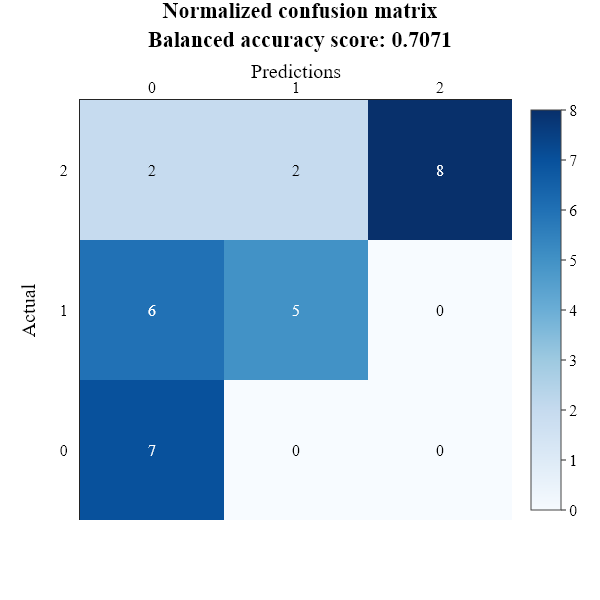

In [26]:
Plots_predictions.multilabel_conf_matrix(y_test, y_pred, labels=[i for i in np.unique(y_test)])

<h1>Advantages and disadvantages of Logistic Regression<h1>

$\text{Advantages of Logistic Regression:}$<p>
$\text{- Ease of implementation and interpretation of the results obtained,}$<p>
$\text{- The returned values of the coefficients can give information on the significance of the variables (as long as they have similar distributions),}$<p>
$\text{- Short compilation time.}$<br>

$\text{Disadvantages of Logistic Regression:}$<p>
$\text{- With a larger number of variables, over-fitting problems arise,}$<p>
$\text{- The assumption of linearity between the dependent variable and the independent variables.}$